In [ ]:
import matplotlib.pyplot as plt

let x = [0.42]

First I benchmarked Postgraphile. Postgraphile was connected to the same database, and supplied the exact same query. I then ran the perf stat command alongside curl to request JSON from Postgraphile repeatedly 100 times in order to get a good average

``
perf stat -r 100 -d curl -g \
-X POST \
-H "Content-Type: application/json" \
-d '{"query":"query{ siteUsers{ id reputation views upvotes downvotes postsByOwneruserid{ id posttypeid } } }"}' \
http://localhost:4000/graphql
``

The average over these 100 runs was 420ms.

Next, I fed the same query to Poggers v1. Poggers v1 mimicked Postgrahile (it builds the exact same SQL query).
After running this query 100 times, it averaged at 128ms.




Finally, I tested Poggers v2. Poggers v2 only requires for the data to be grouped by parent primary keys, and constructs the data JSON data itself. It averaged at 35ms over 100 iterations

<BarContainer object of 3 artists>

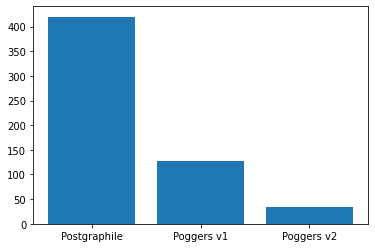

In [4]:
plt.bar(["Postgraphile", "Poggers v1", "Poggers v2"], [420, 128, 35])